In [2]:
import seaborn as sns

In [3]:
#Load dataset from seaborn lib
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [4]:
#observe dataset
df = planets.copy()  #copy function cares the dataset from manipulation
df.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [5]:
df.tail() #for last 5 rows

method  number  orbital_period  mass  distance  year
1030  Transit       1        3.941507   NaN     172.0  2006
1031  Transit       1        2.615864   NaN     148.0  2007
1032  Transit       1        3.191524   NaN     174.0  2007
1033  Transit       1        4.125083   NaN     293.0  2008
1034  Transit       1        4.187757   NaN     260.0  2008

In [6]:
#structural information of ds
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
import pandas as pd

df.method = pd.Categorical(df.method) #change objects method to categorical

In [9]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [10]:
#definiton of DS
df.shape

(1035, 6)

In [11]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [12]:
df.describe().T  #see the DS like table. Easy to understand the data

count         mean           std          min         25%  \
number          1035.0     1.785507      1.240976     1.000000     1.00000   
orbital_period   992.0  2002.917596  26014.728304     0.090706     5.44254   
mass             513.0     2.638161      3.818617     0.003600     0.22900   
distance         808.0   264.069282    733.116493     1.350000    32.56000   
year            1035.0  2009.070531      3.972567  1989.000000  2007.00000   

                      50%       75%       max  
number             1.0000     2.000       7.0  
orbital_period    39.9795   526.005  730000.0  
mass               1.2600     3.040      25.0  
distance          55.2500   178.500    8500.0  
year            2010.0000  2012.000    2014.0

In [13]:
#observe the missing data
df.isnull().values.any()

True

In [14]:
df.isnull().sum() #the number of miising data on each variable

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [15]:
df["orbital_period"].fillna(0, inplace = True)  #filling the empty 

In [16]:
df.isnull().sum() #check

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [17]:
df["mass"].fillna(df.mass.mean(), inplace = True) #filling with average value

In [18]:
df.isnull().sum() #check

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [19]:
df["distance"].fillna(df.distance.mean(), inplace=True)

In [20]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [21]:
df = planets.copy()
df.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [22]:
df.isnull().sum() #check orginal DS

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [23]:
#Categorical variable Features
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()


In [24]:
cat_df = df.select_dtypes(include=["object"])

In [25]:
cat_df.head()

method
0  Radial Velocity
1  Radial Velocity
2  Radial Velocity
3  Radial Velocity
4  Radial Velocity

In [26]:
#access to class and number of class at categorical variable
cat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [27]:
cat_df["method"].value_counts().count()

10

In [28]:
#access to frequencies of class in categorical variable
cat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

<Axes: >

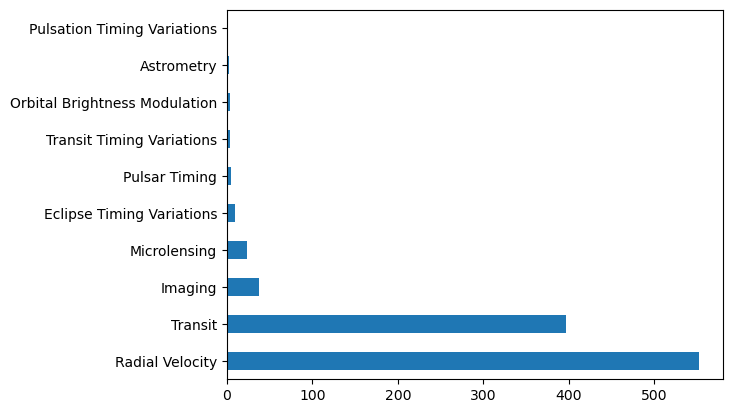

In [29]:
df["method"].value_counts().plot.barh()

In [30]:
#Features of continous variable
df = planets.copy()
df.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [31]:
df_num = df.select_dtypes(include=["float"])
df_num.head()

orbital_period   mass  distance
0         269.300   7.10     77.40
1         874.774   2.21     56.95
2         763.000   2.60     19.84
3         326.030  19.40    110.62
4         516.220  10.50    119.47

In [32]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [33]:
print("Average: " + str(df_num["distance"].mean()))
print("Number of Observation: " + str(df_num["distance"].count())) 
print("Max Value: " + str(df_num["distance"].max()))
print("Min Value: " + str(df_num["distance"].min()))
print("Median: " + str(df_num["distance"].median()))
print("Standart Variation: " + str(df_num["distance"].std()))

Average: 264.06928217821786
Number of Observation: 808
Max Value: 8500.0
Min Value: 1.35
Median: 55.25
Standart Variation: 733.1164929404422
